In [3]:
import fitsio
from astropy.io import fits
from astropy.table import Table
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, match_coordinates_sky

In [6]:
gold_df = pd.read_pickle("/global/project/projectdirs/des/zhou/image_simulation/gold_df.pkl")
cosmos_laigle = pd.read_pickle(
    "/global/project/projectdirs/des/zhou/image_simulation/cosmos_laigle.pkl")

In [7]:
gold_df

,RA,DEC,BDF_MAG_G,BDF_MAG_R,BDF_MAG_I,BDF_MAG_Z,TILENAME,EXT_MASH
0,43.472491,-23.405325,24.964930,23.751747,22.527980,21.757563,DES0253-2332,4
1,43.461953,-41.558311,23.186742,22.238762,22.020476,21.846147,DES0253-4123,4
2,43.507558,-41.269745,24.032733,23.956377,24.140711,24.511635,DES0253-4123,4
3,43.494279,-41.626001,22.247186,21.230396,20.917696,20.730365,DES0253-4123,4
4,43.411342,-28.810702,23.275542,22.236498,21.420447,21.065681,DES0253-2832,4
...,...,...,...,...,...,...,...,...
1471008,9.767921,-39.646586,26.646767,25.090413,24.475382,24.025687,DES0040-3957,4
1471009,9.716286,-38.790271,25.184951,24.576580,24.924963,24.376552,DES0039-3832,4
1471010,9.763348,-55.794633,24.005469,23.421365,23.400327,23.356783,DES0039-5540,4
1471011,9.758884,-26.561717,24.309620,23.840446,23.955729,23.784307,DES0039-2623,3


In [8]:
cosmos_laigle

,des_id,bdf_hlr,bdf_fracdev,mask_flags,bdf_g1,bdf_g2,flux_u,flux_g,flux_r,flux_i,...,mag_Ks_dered,photoz,zp_2,zpdf_l68,zpdf_h68,class,isgal,ALPHA_J2000,DELTA_J2000,NUMBER
218604,37177,0.484553,0.994357,32,-0.030776,-0.120751,424.139896,2095.535134,9930.430352,17311.959160,...,18.075493,0.3797,-99.00,0.3729,0.3867,0.0,1,150.115627,1.612437,218605
219020,89772,0.905912,1.042097,96,0.029054,0.160234,1848.367691,8831.309006,21633.297017,34054.648388,...,17.661931,0.1600,-99.00,0.1532,0.1668,1.0,1,149.627692,1.613328,219021
219743,815033,0.906727,0.497762,0,0.006354,0.002209,23.884389,52.374365,65.782994,123.104235,...,23.354750,2.4407,-99.00,2.1256,2.7112,1.0,1,150.239919,1.614675,219744
219785,685201,0.000003,0.497438,0,0.012469,0.015966,0.005020,0.000323,0.006226,8.429801,...,25.445471,0.5927,4.12,0.2761,3.9776,0.0,1,150.628293,1.614696,219786
219835,643202,0.062756,0.497183,64,0.147998,-0.004005,12.005071,29.011229,35.573655,15.597380,...,28.948659,2.9145,-99.00,2.6419,3.0191,1.0,1,149.894227,1.614807,219836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994566,81494,0.406786,1.075051,0,0.160955,-0.021271,470.014615,1324.418395,4248.263907,7089.370090,...,19.182862,0.3325,-99.00,0.3240,0.3440,1.0,1,150.450982,2.817054,994567
994771,137614,0.313233,-0.364020,0,-0.030851,-0.368808,222.943125,311.341487,692.860240,1126.529525,...,21.227908,0.6755,-99.00,0.6633,0.6933,1.0,1,150.197995,2.817811,994772
994831,168708,0.497611,0.575096,0,-0.094894,-0.279101,222.104719,978.064800,5017.722289,9811.492970,...,19.116963,0.4794,-99.00,0.4719,0.4875,0.0,1,150.514201,2.815009,994832
995164,96593,0.423087,0.019834,0,-0.468419,-0.211732,431.209504,1389.332165,3424.223912,5308.355825,...,19.532932,0.1799,-99.00,0.1730,0.1868,1.0,1,150.744598,2.818154,995165


In [9]:
cosmos_laigle.columns

Index(['des_id', 'bdf_hlr', 'bdf_fracdev', 'mask_flags', 'bdf_g1', 'bdf_g2',
       'flux_u', 'flux_g', 'flux_r', 'flux_i', 'flux_z', 'flux_Y', 'flux_J',
       'flux_H', 'flux_Ks', 'mag_u', 'mag_g', 'mag_r', 'mag_i', 'mag_z',
       'mag_Y', 'mag_J', 'mag_H', 'mag_Ks', 'flux_u_dered', 'flux_g_dered',
       'flux_r_dered', 'flux_i_dered', 'flux_z_dered', 'flux_Y_dered',
       'flux_J_dered', 'flux_H_dered', 'flux_Ks_dered', 'mag_u_dered',
       'mag_g_dered', 'mag_r_dered', 'mag_i_dered', 'mag_z_dered',
       'mag_Y_dered', 'mag_J_dered', 'mag_H_dered', 'mag_Ks_dered', 'photoz',
       'zp_2', 'zpdf_l68', 'zpdf_h68', 'class', 'isgal', 'ALPHA_J2000',
       'DELTA_J2000', 'NUMBER'],
      dtype='object')

In [11]:
band_names = ["G", "R", "I", "Z"]
gold_mag_columns = [f"BDF_MAG_{band}" for band in band_names]
cosmos_mag_columns = ["mag_g", "mag_r", "mag_i", "mag_z"]

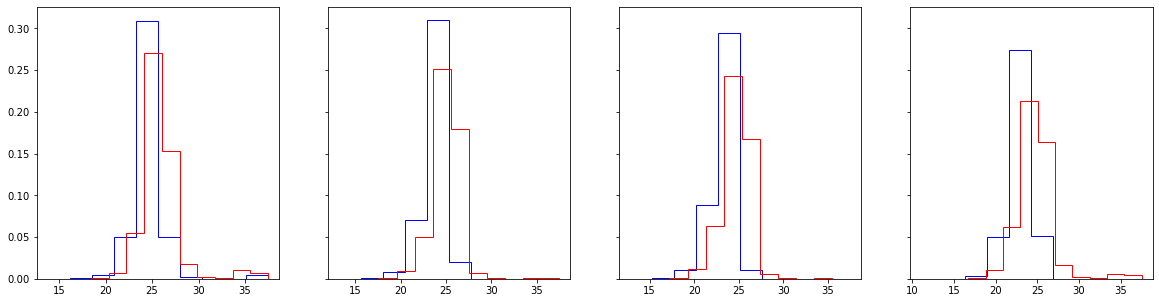

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols= 4, figsize = [20,5],sharey=True)
for i,ax in enumerate(axes):
    ax.hist(gold_df[gold_mag_columns[i]],histtype="step",color ='b', density = True, label="GOLD Lumiosity Function")
    ax.hist(cosmos_laigle[cosmos_mag_columns[i]],histtype="step", color='r', density=True, label="COSMOS Lumiosity Function")